# Исследование атлетов на Олимпийских играх<a class="anchor" id="0-bullet">

* [1. Импортируем библиотеки](#1-bullet)
* [2. Открываем файл](#2-bullet)
* [3. Гистограмма топ-10 стран по золотым медалям](#3-bullet)
* [4.График зависимости возраста спортсменов от завоеванных медалей](#4-bullet)
* [5. Количество медалей у Советских и Российских спортсменов на каждой олимпиаде](#5-bullet)
* [6.Гистограмма количества медалей 25 лучших спортсменов](#6.-bullet)
* [7. В каком городе наши спортсмены завоевали наибольшее количетво золотых медалей](#7-bullet)
* [8. Общие грифики по каждому столбцу](#8-bullet)
* [9. Завсимость возраста спортсмена от года проведения Олимпиады](#9-bullet)
* [10. График зависимости веса спортсмена от его возраста](#10-bullet)
* [11. Отношения между всем переменными](#11-bullet)
* [12. Среднее значение и медиана веса и роста](#12-bullet)
* [13 Зависимость среднего роста от среднего веса в зависимости от вида спорта](#13-bullet)
* [14 Таблица корреляции](#14-bullet)
* [15 Количество зимних и летних видов спорта](#15-bullet)

## 1. Импортируем библиотеки<a class="anchor" id="1-bullet"></a>
[назад к оглавлению](#0-bullet)

In [588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Открываем файл<a class="anchor" id="2-bullet"></a>
[назад к оглавлению](#0-bullet)

In [589]:
olimp = pd.read_csv('athlete_events.csv')
olimp

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## 3. Гистограмма топ-10 стран по золотым медалям<a class="anchor" id="3-bullet"></a>
[назад к оглавлению](#0-bullet)

In [590]:
olimp_medal_gold = olimp[olimp['Medal'] == 'Gold']
olimp_medal_gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [591]:
olimp_medal_1 = pd.DataFrame(olimp_medal_gold.groupby('Team')['Medal'].value_counts())
olimp_medal_1.columns = ['Count_gold_medals']
olimp_medal_1.reset_index(inplace=True)
olimp_medal_1

,Team,Medal,Count_gold_medals
0,Algeria,Gold,5
1,Amateur Athletic Association,Gold,5
2,Ancora,Gold,4
3,Angelita,Gold,12
4,Argentina,Gold,91
...,...,...,...
237,Western Golf Association-1,Gold,10
238,White Lady,Gold,3
239,Winnipeg Shamrocks-1,Gold,12
240,Yugoslavia,Gold,130


In [592]:
olimp_medal_1.drop('Medal', axis=1, inplace=True)
olimp_medal_1

,Team,Count_gold_medals
0,Algeria,5
1,Amateur Athletic Association,5
2,Ancora,4
3,Angelita,12
4,Argentina,91
...,...,...
237,Western Golf Association-1,10
238,White Lady,3
239,Winnipeg Shamrocks-1,12
240,Yugoslavia,130


In [593]:
olimp_medal_1.sort_values('Count_gold_medals', 
                          ascending=False, inplace=True)

In [594]:
olimp_medal_1 = olimp_medal_1.head(10)
olimp_medal_1

,Team,Count_gold_medals
224,United States,2474
200,Soviet Union,1058
87,Germany,679
112,Italy,535
90,Great Britain,519
80,France,455
205,Sweden,451
102,Hungary,432
35,Canada,422
62,East Germany,369


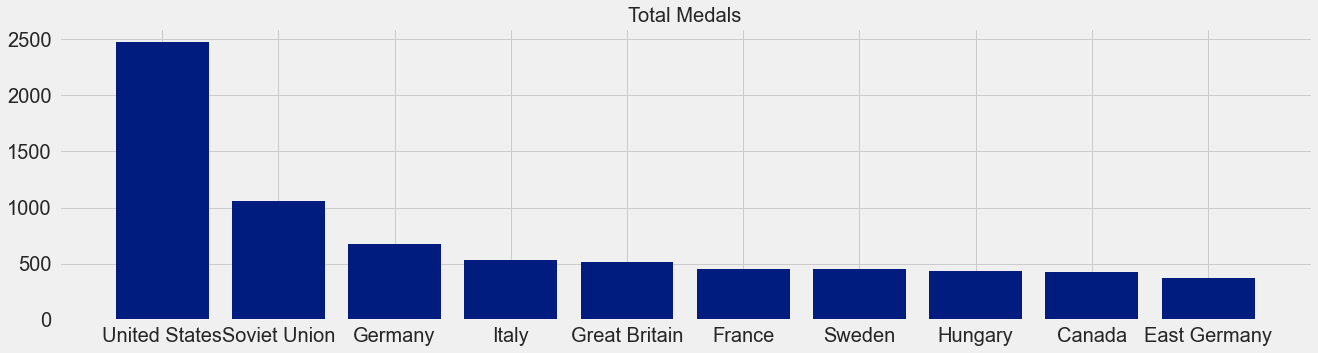

In [595]:
plt.figure(figsize=(20,5))
plt.bar(data=olimp_medal_1, x='Team', 
        height='Count_gold_medals')
plt.title('Total Medals')
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);

In [596]:
olimp_medal = pd.DataFrame(olimp[olimp['Medal'].notnull()])
olimp_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [597]:
olimp_medal['Medal'] = olimp_medal['Medal'].apply(lambda x: 1 if x=='Gold' else 2 if x=='Silver' else 3)
olimp_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,3
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,3
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,3
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,2
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,3
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",3
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,3


In [598]:
olimp_medal['Sex'] = olimp_medal['Sex'].map({'M': 1, 'F': 0})
olimp_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,1,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
37,15,Arvo Ossian Aaltonen,1,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,3
38,15,Arvo Ossian Aaltonen,1,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,3
40,16,Juhamatti Tapio Aaltonen,1,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,3
41,17,Paavo Johannes Aaltonen,1,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),0,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,2
271080,135553,Galina Ivanovna Zybina (-Fyodorova),0,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,3
271082,135554,Bogusaw Zych,1,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",3
271102,135563,Olesya Nikolayevna Zykina,0,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,3


In [599]:
olimp['Sex'] = olimp['Sex'].map({'M': 1, 'F': 0})
olimp

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,1,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,1,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,0,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,1,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,1,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,1,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,1,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## 4. График зависимости возраста спортсменов от завоеванных медалей<a class="anchor" id="4-bullet"></a>
[назад к оглавлению](#0-bullet)

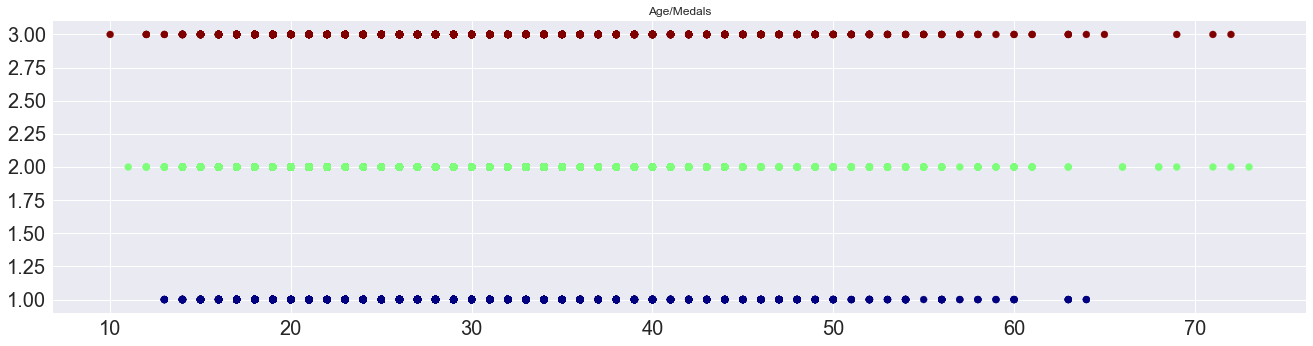

In [600]:
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
plt.scatter(x=olimp_medal['Age'], 
            y=olimp_medal['Medal'], 
            c=olimp_medal['Medal'], 
            cmap='jet')
plt.title('Age/Medals')
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);

**Видим, что возраст для завоевания золотой медали в основном должен быть в пределах от 13 до 60 лет**

## 5. Количество медалей у Советских и Российских спортсменов на каждой олимпиаде<a class="anchor" id="5-bullet"></a>
[назад к оглавлению](#0-bullet)

In [601]:
olimp_USSR_Russia = olimp_medal[(olimp_medal['Team']=='Soviet Union') | (olimp_medal['Team']=='Russia')]
olimp_USSR_Russia

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
163,67,Mariya Vasilyevna Abakumova (-Tarabina),0,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,2
195,90,Tamila Rashidovna Abasova,0,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,2
550,316,Zagalav Abdulbekovich Abdulbekov,1,26.0,160.0,62.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",1
789,455,Denis Mikhaylovich Ablyazin,1,19.0,161.0,62.0,Russia,RUS,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,3
790,455,Denis Mikhaylovich Ablyazin,1,19.0,161.0,62.0,Russia,RUS,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271076,135553,Galina Ivanovna Zybina (-Fyodorova),0,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,1
271078,135553,Galina Ivanovna Zybina (-Fyodorova),0,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,2
271080,135553,Galina Ivanovna Zybina (-Fyodorova),0,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,3
271102,135563,Olesya Nikolayevna Zykina,0,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,3


In [602]:
olimp_games = pd.DataFrame(olimp_USSR_Russia.groupby('Year')['Medal'].count())
olimp_games

,Medal
Year,
1908,3
1912,7
1952,117
1956,206
1960,209
1964,219
1968,225
1972,255
1976,336


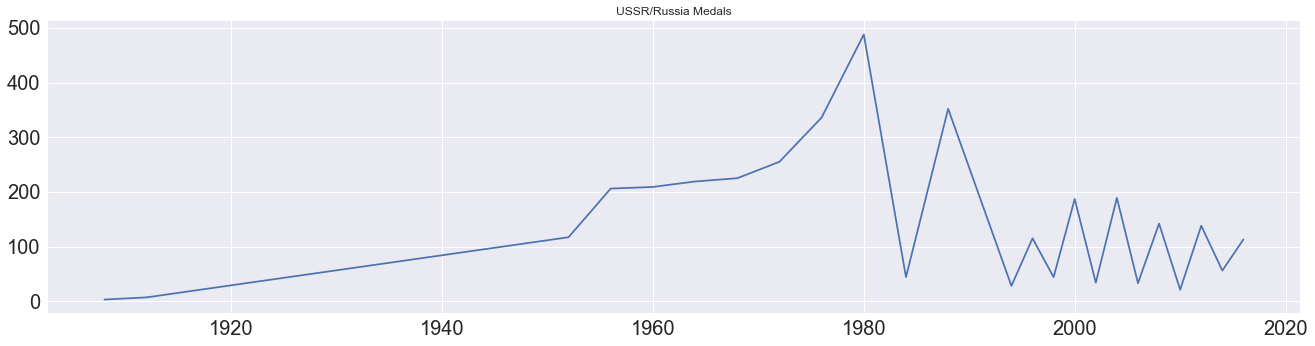

In [603]:
plt.figure(figsize=(20,5))
plt.plot(olimp_games['Medal'])
plt.title('USSR/Russia Medals')
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);

**По графику заметим, что до Олимпиады 1980 у наших спортсменов был рост медалей**

In [604]:
olimp_USSR_Russia_summer = olimp_USSR_Russia[olimp_USSR_Russia['Season']=='Summer']
olimp_USSR_Russia_summer

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
163,67,Mariya Vasilyevna Abakumova (-Tarabina),0,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,2
195,90,Tamila Rashidovna Abasova,0,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,2
550,316,Zagalav Abdulbekovich Abdulbekov,1,26.0,160.0,62.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",1
789,455,Denis Mikhaylovich Ablyazin,1,19.0,161.0,62.0,Russia,RUS,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,3
790,455,Denis Mikhaylovich Ablyazin,1,19.0,161.0,62.0,Russia,RUS,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271076,135553,Galina Ivanovna Zybina (-Fyodorova),0,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,1
271078,135553,Galina Ivanovna Zybina (-Fyodorova),0,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,2
271080,135553,Galina Ivanovna Zybina (-Fyodorova),0,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,3
271102,135563,Olesya Nikolayevna Zykina,0,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,3


In [605]:
olimp_games_summer = pd.DataFrame(olimp_USSR_Russia_summer.groupby('Year')['Medal'].count())
olimp_games_summer

,Medal
Year,
1908,3
1912,7
1952,117
1956,169
1960,167
1964,174
1968,192
1972,214
1976,286


In [606]:
olimp_USSR_Russia_winter = olimp_USSR_Russia[olimp_USSR_Russia['Season']=='Winter']
olimp_USSR_Russia_winter

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
974,548,Yekaterina Konstantinovna Abramova,0,23.0,167.0,65.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Women's Team Pursuit (6 laps),3
1210,680,Rita Nikolayevna Achkina,0,30.0,168.0,63.0,Soviet Union,URS,1968 Winter,1968,Winter,Grenoble,Cross Country Skiing,Cross Country Skiing Women's 3 x 5 kilometres ...,3
1962,1085,Maksim Sergeyevich Afinogenov,1,22.0,183.0,88.0,Russia,RUS,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,3
2934,1639,Albina Khamitovna Akhatova,0,21.0,160.0,55.0,Russia,RUS,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,2
2936,1639,Albina Khamitovna Akhatova,0,25.0,160.0,55.0,Russia,RUS,2002 Winter,2002,Winter,Salt Lake City,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269927,135047,Nikolay Semyonovich Zimyatov,1,24.0,183.0,68.0,Soviet Union,URS,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,1
269929,135047,Nikolay Semyonovich Zimyatov,1,28.0,183.0,68.0,Soviet Union,URS,1984 Winter,1984,Winter,Sarajevo,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,1
269931,135047,Nikolay Semyonovich Zimyatov,1,28.0,183.0,68.0,Soviet Union,URS,1984 Winter,1984,Winter,Sarajevo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,2
269947,135058,Viktor Aleksandrovich Zinger,1,26.0,172.0,70.0,Soviet Union,URS,1968 Winter,1968,Winter,Grenoble,Ice Hockey,Ice Hockey Men's Ice Hockey,1


In [607]:
olimp_games_winter = pd.DataFrame(olimp_USSR_Russia_winter.groupby('Year')['Medal'].count())
olimp_games_winter

,Medal
Year,
1956,37
1960,42
1964,45
1968,33
1972,41
1976,50
1980,46
1984,44
1988,52


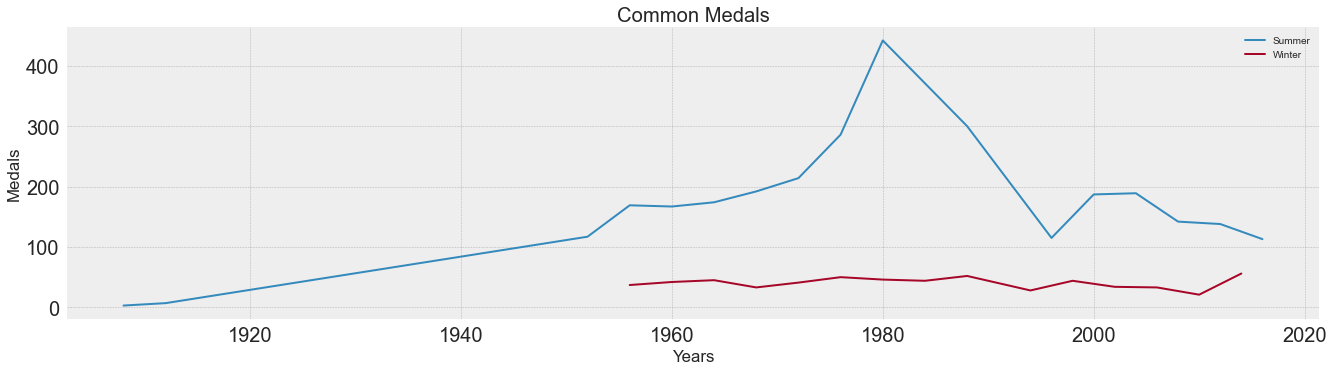

In [608]:
plt.style.use('bmh')
plt.figure(figsize=(20,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Years')
plt.ylabel('Medals')
plt.plot(olimp_games_summer['Medal'], label = 'Summer')
plt.plot(olimp_games_winter['Medal'], label = 'Winter')
plt.title('Common Medals')
plt.legend()

**По графику видно, что на летних олимпиадах у наших спортсменов меалей значительно больше**

## 6. Гистограмма количества медалей 25 лучших спортсменов<a class="anchor" id="6-bullet"></a>
[назад к оглавлению](#0-bullet)

In [610]:
best_olimpics = pd.DataFrame(olimp_medal['Name'].value_counts())
best_olimpics

,Name
"Michael Fred Phelps, II",28
Larysa Semenivna Latynina (Diriy-),18
Nikolay Yefimovich Andrianov,15
Ole Einar Bjrndalen,13
Edoardo Mangiarotti,13
...,...
Henry Ludwig Duey,1
Georg Strobl,1
Erling Jensen,1
Vctor Garca Campos,1


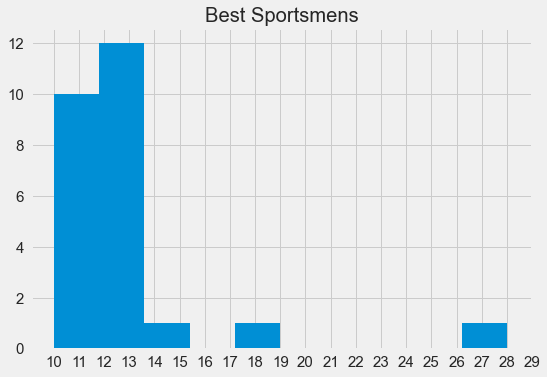

In [611]:
plt.style.use('fivethirtyeight')
plt.hist(best_olimpics['Name'].head(25))
plt.title('Best Sportsmens')
plt.xticks(range(10,30,1), fontsize = 15);
plt.yticks(fontsize = 15);

**22 из 25 лучших спортсменов завоевали от 10 до 14 медалей**

## 7. В каком городе наши спортсмены завоевали наибольшее количетво золотых медалей<a class="anchor" id="7-bullet"></a>
[назад к оглавлению](#0-bullet)

In [612]:
olimp_USRUS_sum = olimp_USSR_Russia_summer[olimp_USSR_Russia_summer['Medal'] == 1]
olimp_USRUS_sum

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
550,316,Zagalav Abdulbekovich Abdulbekov,1,26.0,160.0,62.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",1
1043,582,Saypulla Atavovich Absaidov,1,22.0,168.0,68.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Lightweight, Freestyle",1
1106,619,Magomedgasan Mingazhutdinovich Abushev,1,20.0,170.0,62.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Featherweight, Freestyle",1
2929,1637,Yelena Rabigovna Akhaminova (-Sokolovskaya),0,18.0,181.0,80.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Volleyball,Volleyball Women's Volleyball,1
2961,1649,Artur Kamilevich Akhmatkhuzin,1,28.0,187.0,79.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Men's Foil, Team",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270104,135126,Nina Anatolivna Ziuskova,0,28.0,180.0,67.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 4 x 400 metres Relay,1
270588,135331,Olha Valentynivna Zubareva,0,22.0,182.0,90.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Handball,Handball Women's Handball,1
270773,135415,Robertas ulpa,1,20.0,193.0,82.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Breaststroke,1
270934,135488,Nataliya Vladimirovna Zuyeva,0,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,1


In [613]:
olimp_city = pd.DataFrame(olimp_USRUS_sum.groupby('City')['Medal'].count())
olimp_city

,Medal
City,
Athina,48
Atlanta,36
Beijing,43
Helsinki,36
London,51
Melbourne,68
Mexico City,65
Montreal,114
Moskva,187


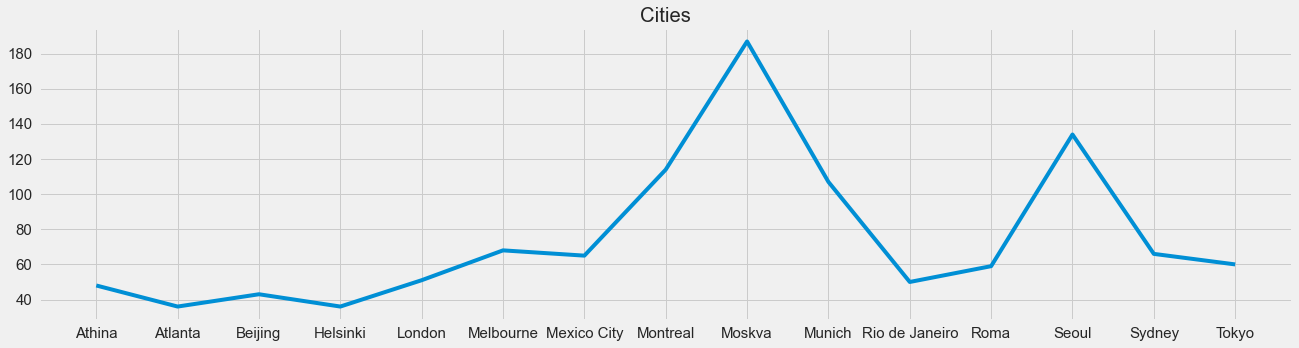

In [614]:
plt.figure(figsize=(20,5))
plt.plot(olimp_city['Medal'])
plt.title('Cities')
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

**Олимпиада 1980 принесла нашим спортсменам наибольшее количество золотых медалей**

## 8. Общие грифики по каждому столбцу<a class="anchor" id="8-bullet"></a>
[назад к оглавлению](#0-bullet)

In [615]:
column = list(olimp.columns[2:-3])
column

['Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City']

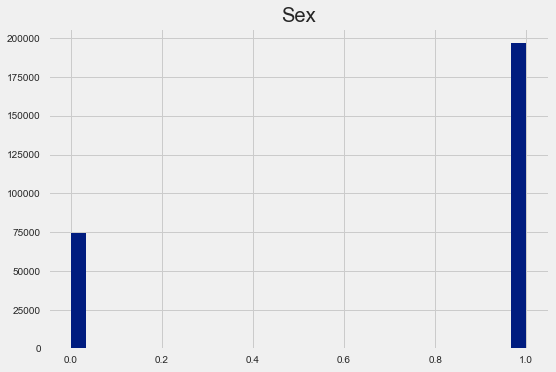

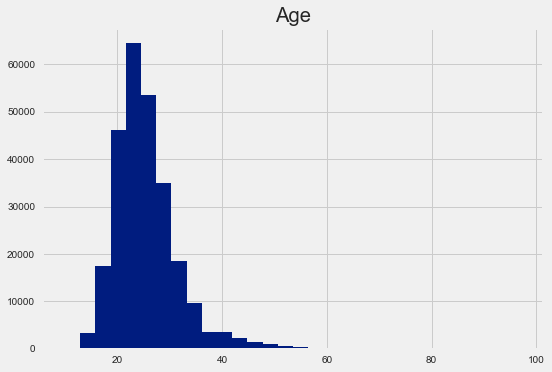

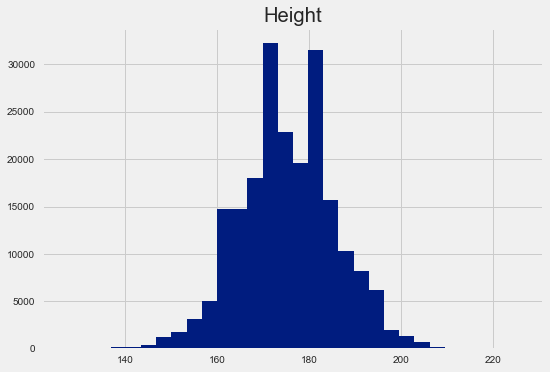

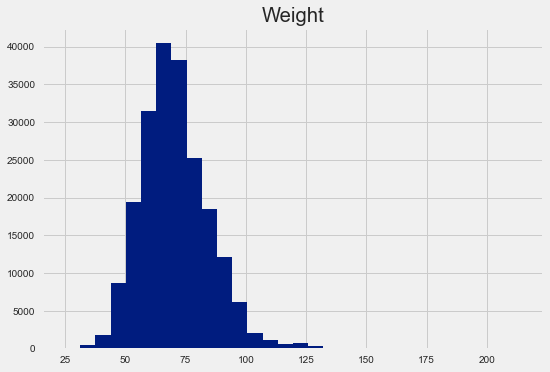

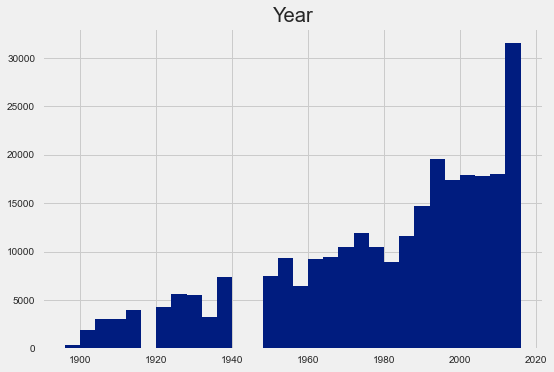

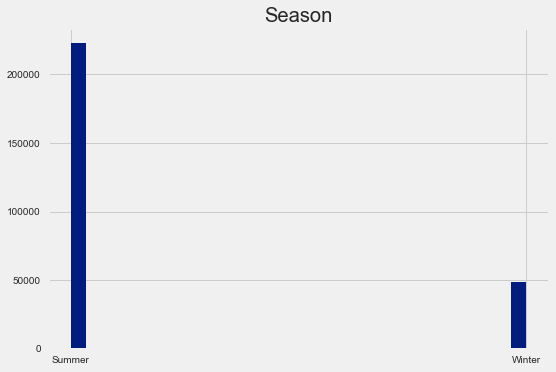

In [616]:
for clmn in column:
    if clmn == 'Team' or clmn == 'NOC' or clmn == 'Games' or clmn == 'City':
        continue
    plt.style.use('seaborn-dark-palette')
    plt.hist(olimp[clmn], bins=30)
    plt.title(clmn)
    plt.show()

## 9. Завсимость возраста спортсмена от года проведения Олимпиады<a class="anchor" id="9-bullet"></a>
[назад к оглавлению](#0-bullet)

C:\Users\ryzhk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


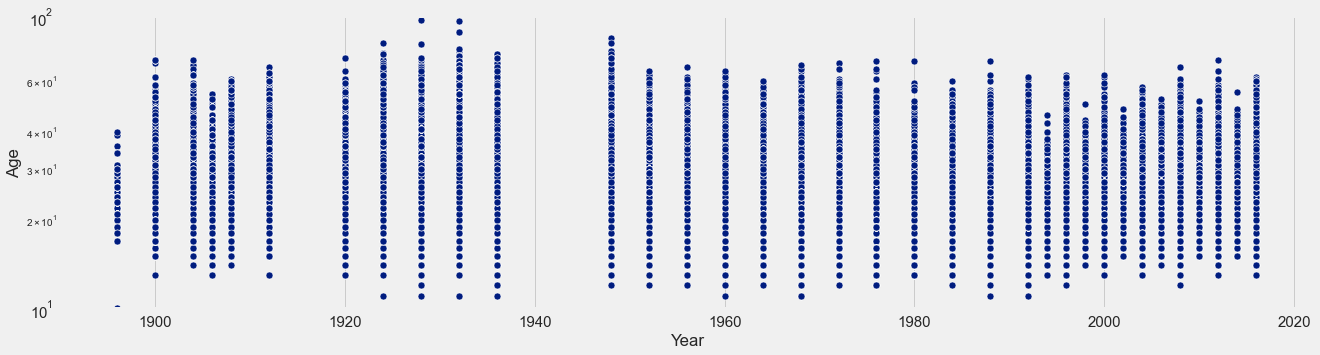

In [617]:
f, ax = plt.subplots(figsize=(20, 5))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set(yscale="log", ylim=(10,100))
sns.scatterplot(olimp['Year'], olimp['Age']);

**Видим, что в последнее время на летних ОИ участвуют более возрастые спортсмены**

## 10. График зависимости веса спортсмена от его возраста<a class="anchor" id="10-bullet"></a>
[назад к оглавлению](#0-bullet)

C:\Users\ryzhk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


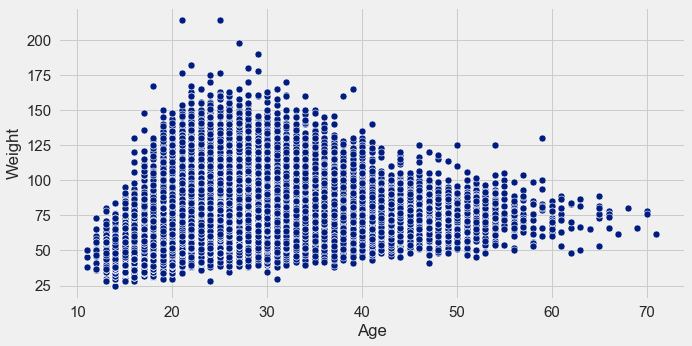

In [618]:
f, ax = plt.subplots(figsize=(10, 5))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# ax.set(yscale="log", ylim=(-5,3))
sns.scatterplot(olimp['Age'], olimp['Weight'], ax=ax);

**Видим, что с 15 до 35 лет участвуют спортсмены с мамым большим весом**

## 11. Отношения между всем переменными<a class="anchor" id="11-bullet"></a>
[назад к оглавлению](#0-bullet)

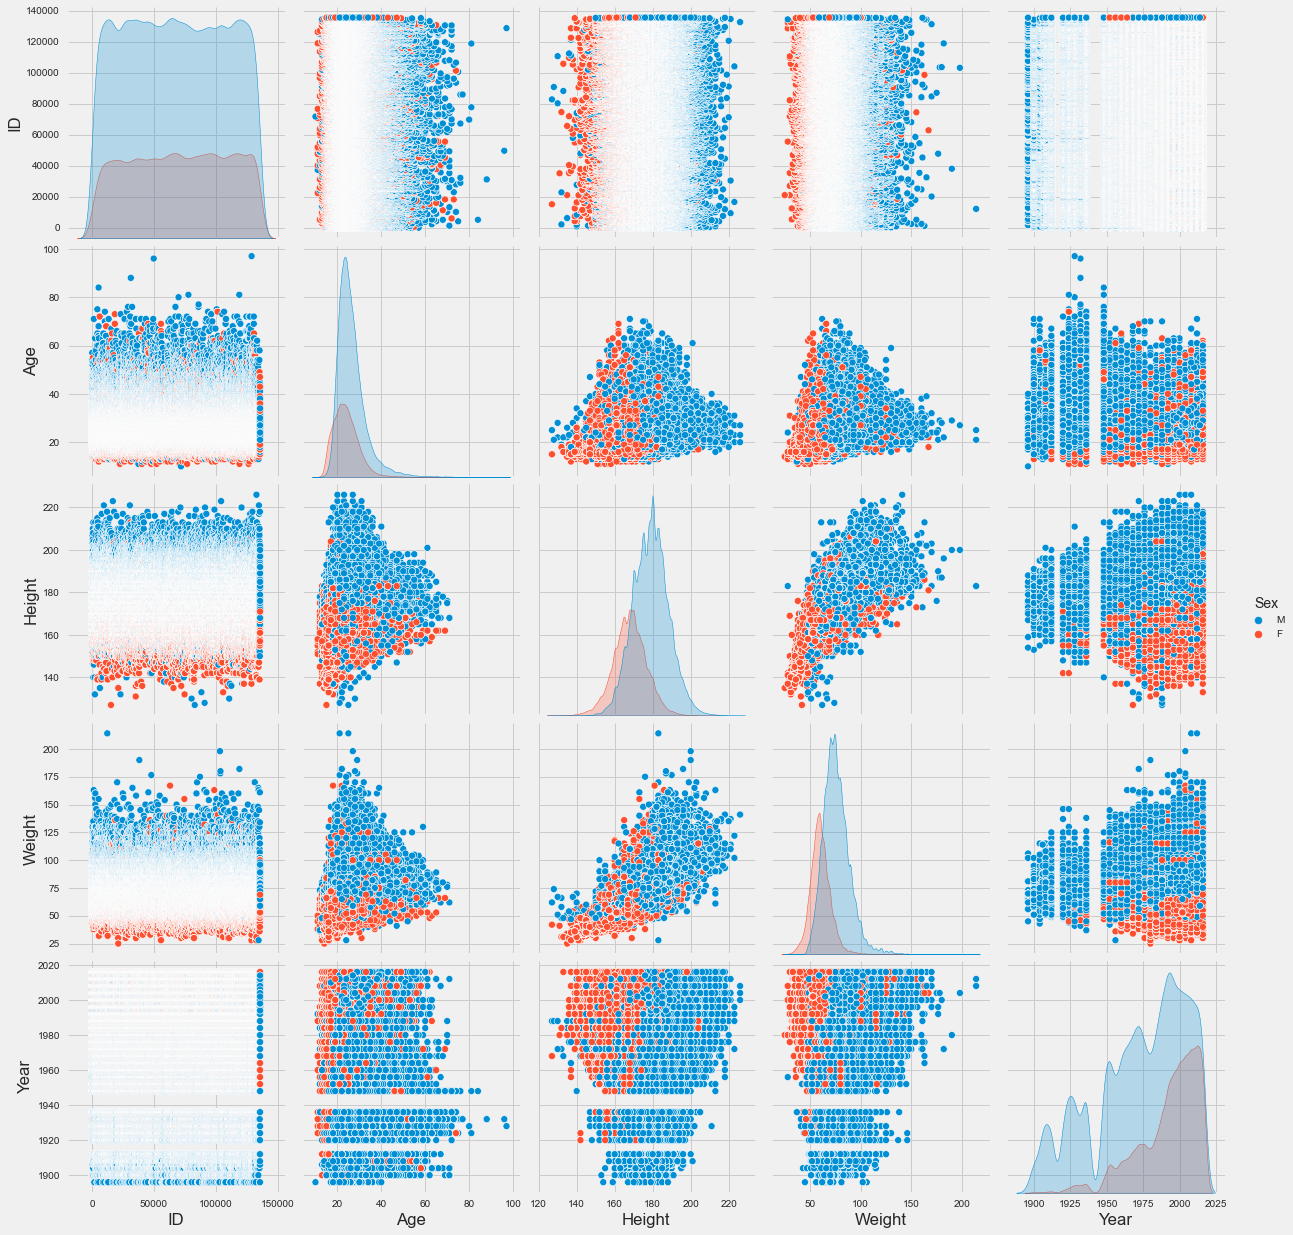

In [364]:
sns.pairplot(olimp, hue='Sex', height=3.5)

## 12. Среднее значение и медиана веса и роста<a class="anchor" id="12-bullet"></a>
[назад к оглавлению](#0-bullet)

In [621]:
mean_median = pd.DataFrame(olimp.groupby('Sex').agg({'Height': ['mean', 'median'], 
                                                     'Weight':['mean', 'median']}))
mean_median

Height            Weight       
           mean median       mean median
Sex                                     
0    167.839740  168.0  60.021252   59.0
1    178.858463  179.0  75.743677   74.0

In [622]:
mean_median['Height']['mean'][1]

178.85846329588276

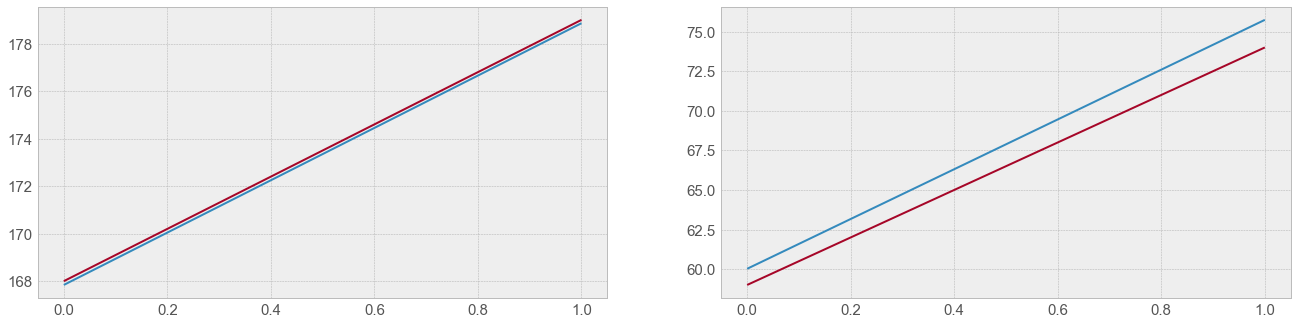

In [691]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(mean_median['Height'])
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.subplot(1, 2, 2)
plt.plot(mean_median['Weight'])
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

**По данным графикам видно, что разброс по весу больше, чем по русту**

## 13. Зависимость среднего роста от среднего веса в зависимости от вида спорта<a class="anchor" id="13-bullet"></a>
[назад к оглавлению](#0-bullet)

In [627]:
olimp[olimp['Age'].notnull()]['Age'].mean()

25.556898357297374

In [628]:
olimp['Height'] = olimp['Height'].fillna((mean_median['Height']['mean'][0]+mean_median['Height']['mean'][1])/2)
olimp['Weight'] = olimp['Weight'].fillna((mean_median['Weight']['mean'][0]+mean_median['Weight']['mean'][1])/2)
olimp['Age'] = olimp['Age'].fillna(olimp[olimp['Age'].notnull()]['Age'].mean())
olimp

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,1,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,1,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,1,24.0,173.349102,67.882464,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,1,34.0,173.349102,67.882464,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,0,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,1,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,1,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,1,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,1,30.0,185.000000,96.000000,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [629]:
olimp.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [630]:
olimp_2 = olimp.groupby('Sport').agg({'Height': 'mean', 'Weight':'mean'})
olimp_2

,Height,Weight
Sport,,
Aeronautics,173.349102,67.882464
Alpine Skiing,173.450454,70.892868
Alpinism,173.349102,67.882464
Archery,173.227421,69.602547
Art Competitions,173.370455,67.996345
...,...,...
Tug-Of-War,174.691881,76.365475
Volleyball,186.509765,78.489152
Water Polo,181.675078,79.699200


In [631]:
olimp_2.reset_index(inplace=True)

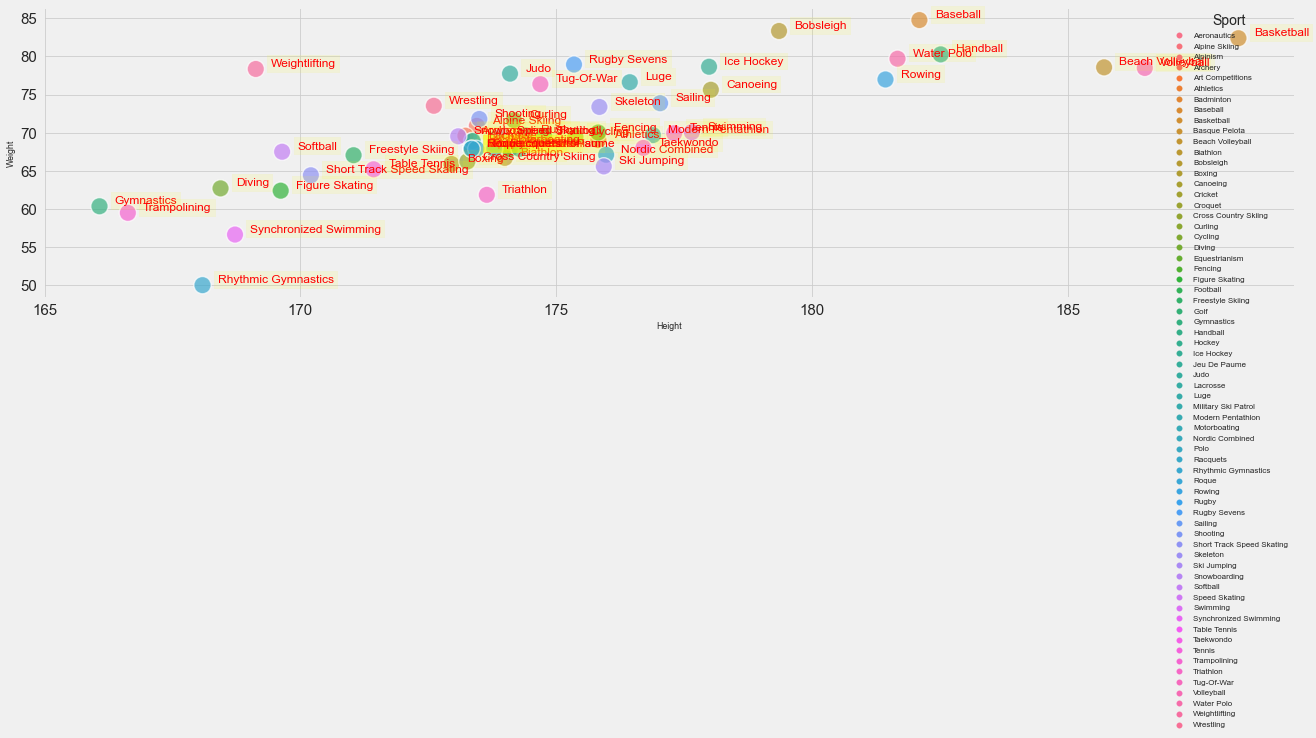

In [632]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(20,5))
sns.scatterplot(data=olimp_2, 
                x='Height', 
                y='Weight', 
                hue=olimp_2['Sport'], 
                cmap='viridis', 
                s=300, 
                alpha=0.7)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
for i in range(olimp_2.shape[0]):
    plt.text(x=olimp_2['Height'][i]+0.3,y=olimp_2['Weight'][i]+0.3,s=olimp_2['Sport'][i], 
          fontdict=dict(color='red',size=12),
          bbox=dict(facecolor='yellow',alpha=0.1))

**По графику видно, что самый бльшой раст наблюдается у волейболистов и баскетболистов, а самый маленький - у гимнастов.**

## 14. Таблица корреляции<a class="anchor" id="14-bullet"></a>
[назад к оглавлению](#0-bullet)

<AxesSubplot:>

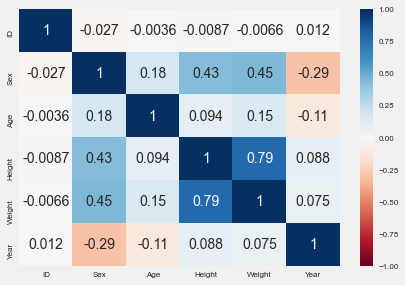

In [634]:
sns.heatmap(olimp.iloc[:, :-1].corr(),
           vmin = -1, vmax=1,
           annot=True, cmap='RdBu')

**Наибольшей корреляцией обладают рост и вес**

## 15. Количество зимних и летних видов спорта<a class="anchor" id="15-bullet"></a>
[назад к оглавлению](#0-bullet)

In [656]:
olimp_summer = olimp[olimp['Season'] == 'Summer']
olimp_winter = olimp[olimp['Season'] == 'Winter']

In [660]:
interval_1 = olimp_summer[(olimp_summer['Year'] <= 1980) & (olimp_summer['Year']>=1950)]
interval_2 = olimp_summer[(olimp_summer['Year'] <= 2016) & (olimp_summer['Year']>=1980)]

In [679]:
interval_3 = olimp_winter[(olimp_winter['Year'] <= 1980) & (olimp_winter['Year']>=1950)]
interval_4 = olimp_winter[(olimp_winter['Year'] <= 2016) & (olimp_winter['Year']>=1980)]

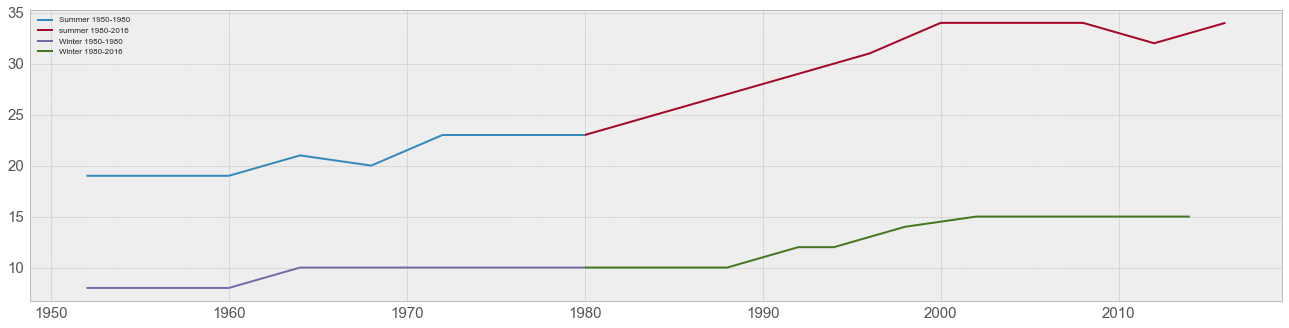

In [688]:
plt.style.use('bmh')
plt.figure(figsize=(20,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(interval_1.groupby('Year')['Sport'].nunique(), label = 'Summer 1950-1980');
plt.plot(interval_2.groupby('Year')['Sport'].nunique(), label = 'summer 1980-2016');
plt.plot(interval_3.groupby('Year')['Sport'].nunique(), label = 'Winter 1950-1980');
plt.plot(interval_4.groupby('Year')['Sport'].nunique(), label = 'Winter 1980-2016');
plt.legend()

**График показывает, что количество летих видов спорта увеличивается быстрее, чем зимних**